In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

### Importing libraries and reading data from csv file

In [2]:
data_read=pd.read_csv('vgsales.csv', delimiter = ',')

### Showing data head( first 5 rows) and tail (last 5 rows) and info(columns, entries and types of entries)

In [3]:
data_read.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data_read.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 1. Which year is the highest for number of releases? 

Highest number of releases in year : 2009.0    1431
Name: Year, dtype: int64


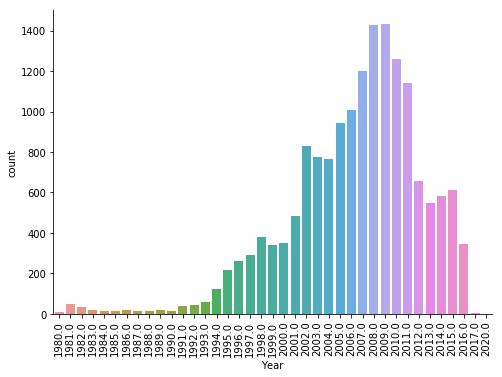

In [6]:
yHighest=data_read['Year'].value_counts()[data_read['Year'].value_counts() == data_read['Year'].value_counts().max()]
print("Highest number of releases in year :",yHighest)
data_read.groupby('Year')['Year'].count()
fg = sns.catplot('Year', data=data_read, kind='count', aspect=1.4)
fg.set_xlabels('Year')
fg.set_xticklabels(rotation=90)

###  We can see that highest release number occurs in 2009. 2008 and 2010 also have high number release like 2009. 

## 2.Which year is the highest for Global sales?

In [7]:
data_read.groupby(['Year'])['Global_Sales'].agg('sum')[data_read.groupby(['Year'])['Global_Sales'].agg('sum') == data_read.groupby(['Year'])['Global_Sales'].agg('sum').max()]


Year
2008.0    678.9
Name: Global_Sales, dtype: float64

### When we group global sales by year we found that 2008 is the highest for Global Sales. 

## 3.Are there any relation between number of releases and global sales?

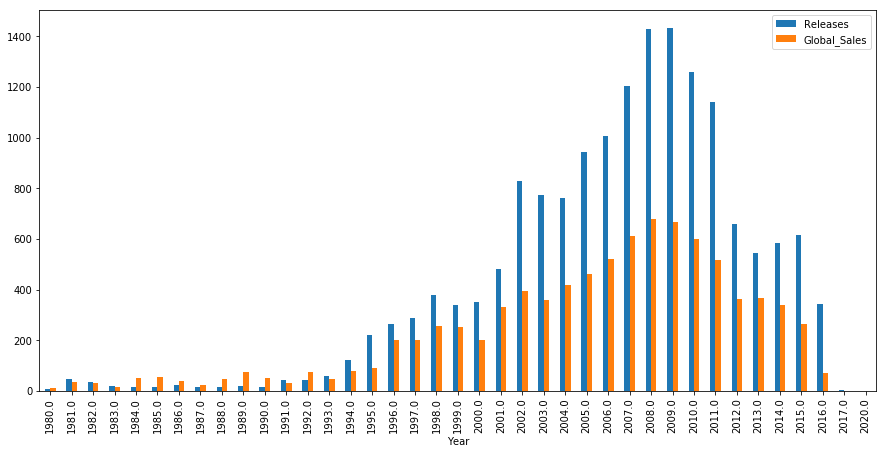

In [8]:
df1 = data_read.groupby('Year')['Year'].agg('count')
df2 = data_read.groupby(['Year'])['Global_Sales'].agg('sum')
df1 = df1.to_frame()
merge_test = df1.merge(df2.to_frame(), left_index=True, right_index=True)
df3= merge_test.rename(columns={'Year': 'Releases'})
df3[["Releases", "Global_Sales"]].plot(kind='bar',figsize=(15,7))

### When we compare relase number with global sales they have correlation.  When we use linear regression ML algorithm it fits model and make good predictions. 

Coefficients: 
 [0.56918283]
Mean squared error: 9494.70
Coefficient of determination: 0.75


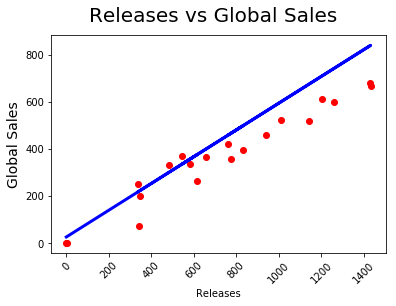

In [9]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
df1 = data_read.groupby('Year')['Year'].agg('count')
df2 = data_read.groupby(['Year'])['Global_Sales'].agg('sum')
df1 = df1.to_frame()
merge_test = df1.merge(df2.to_frame(), left_index=True, right_index=True)
df3= merge_test.rename(columns={'Year': 'Releases'})
x = np.array(df3['Releases']).reshape((-1, 1))
y = np.array(df3['Global_Sales'])

x_train = x[:-20]
x_test = x[-20:]

y_train = y[:-20]
y_test = y[-20:]

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

fig = plt.figure()
plt.scatter(x_test, y_test,  color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
fig.suptitle('Releases vs Global Sales', fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Global Sales', fontsize=14)
plt.xlabel('Releases')

plt.show()

## 4.Which platform is most popular for games?

DS    2163
Name: Platform, dtype: int64


Text(0.5,0,'')

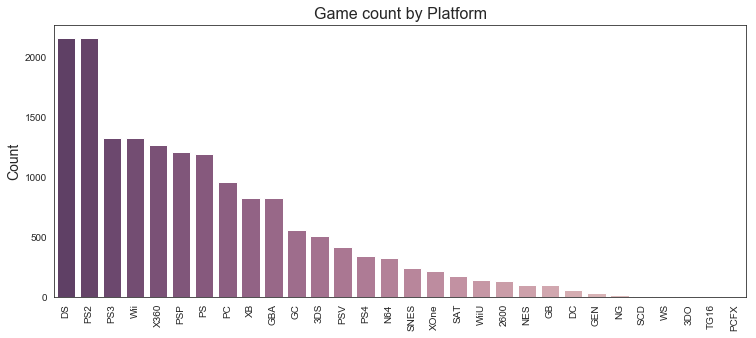

In [10]:
pMost=data_read['Platform'].value_counts()[data_read['Platform'].value_counts() == data_read['Platform'].value_counts().max()]
print(pMost)
chart = data_read[['Name', 'Platform']].groupby(['Platform']).count().sort_values('Name', ascending=False).reset_index()
sns.set_style("white")
plt.figure(figsize=(12.4, 5))
plt.xticks(rotation=90)
sns.barplot(x='Platform', y='Name', data=chart[:30], palette=sns.cubehelix_palette((30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by Platform'), fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('')


### Highest game count is in DS platform, PS2 , PS3, Wii and X360 follow DS.

## 5.	Which publisher published max number of games?

Electronic Arts    1351
Name: Publisher, dtype: int64


Text(0.5,0,'')

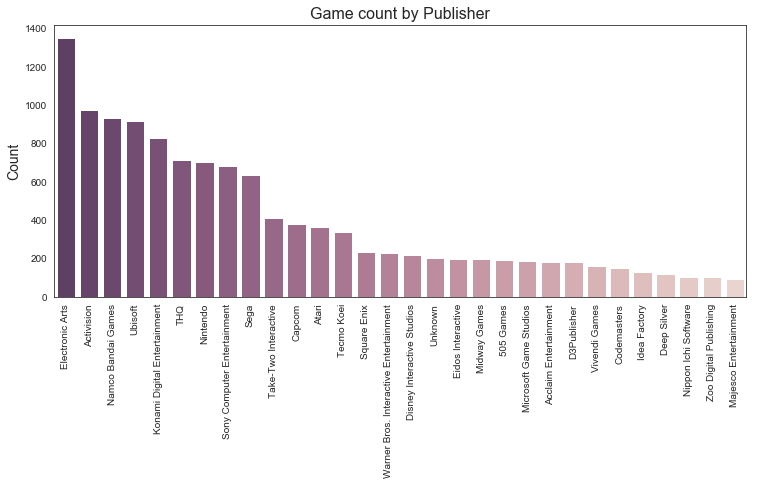

In [11]:
pMost=data_read['Publisher'].value_counts()[data_read['Publisher'].value_counts() == data_read['Publisher'].value_counts().max()]
print(pMost)

chart = data_read[['Name', 'Publisher']].groupby(['Publisher']).count().sort_values('Name', ascending=False).reset_index()
sns.set_style("white")
plt.figure(figsize=(12.4, 5))
plt.xticks(rotation=90)
sns.barplot(x='Publisher', y='Name', data=chart[:30], palette=sns.cubehelix_palette((30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by Publisher'), fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('')

### Electronic Arts has published highest number of games. Activision,Namco Bandai Games and Ubisoft  follow Electronic Arts

## 6.	Which genre (style) is most popular for video games?

Action    3316
Name: Genre, dtype: int64


Text(0.5,0,'')

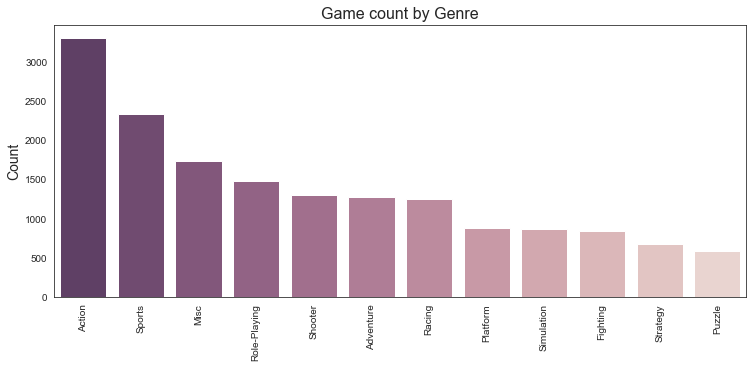

In [12]:
gMost=data_read['Genre'].value_counts()[data_read['Genre'].value_counts() == data_read['Genre'].value_counts().max()]
print(gMost)

chart = data_read[['Name', 'Genre']].groupby(['Genre']).count().sort_values('Name', ascending=False).reset_index()
sns.set_style("white")
plt.figure(figsize=(12.4, 5))
plt.xticks(rotation=90)
sns.barplot(x='Genre', y='Name', data=chart[:12], palette=sns.cubehelix_palette((12), dark=0.3, light=.85, reverse=True)).set_title(('Game count by Genre'), fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('')

### Action games has the highest number. Sport, Misc and Role Playing games follow Action games.

## 7.	Which region contributed to the maximum sales of the video games?

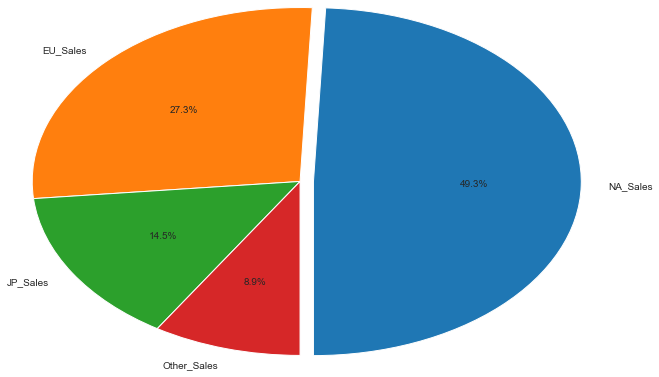

In [13]:
data_read[["NA_Sales", "EU_Sales","JP_Sales","Other_Sales"]].sum().plot(kind='pie', autopct="%1.1f%%", explode=(0.1,0,0,0), startangle=270, radius=2)

### NA Sales have highest share of total sales by 49.3%. EU sales and Japan sales follows.

## 8.	Are there any relation between Global sales and regional sales?

Text(0.5,1,'Average sales over the course of years')

<Figure size 720x720 with 0 Axes>

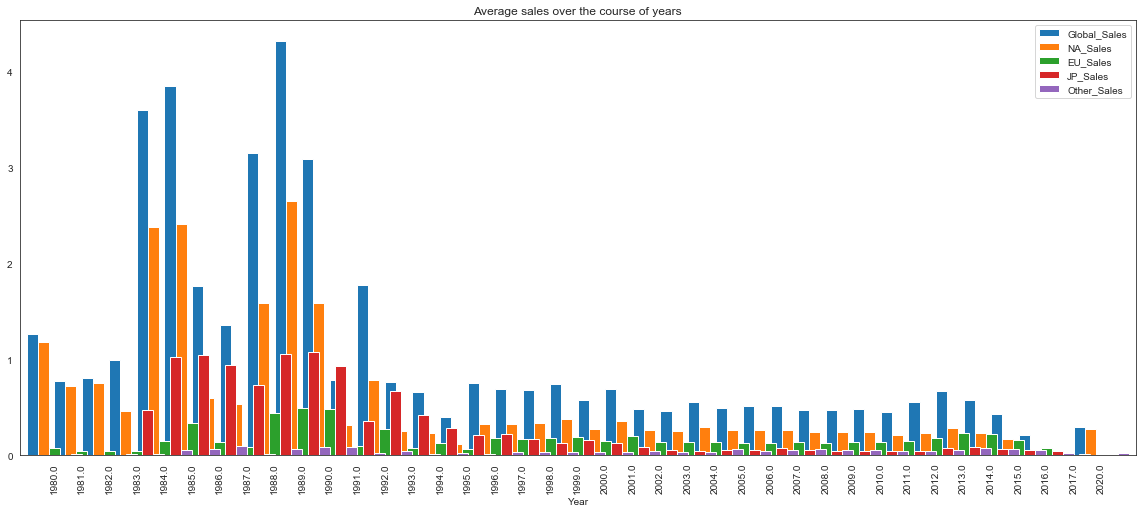

In [14]:
df1 = data_read.groupby(['Year'])
plt.figure(figsize=(10,10))
df1_mean = df1['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
df1_mean.plot(kind='bar',width=2,figsize=(20,8))
plt.title('Average sales over the course of years')

### We see that most of the region sales consists with global sales.

## 9.	Which games popular for which regions?

In [15]:
df_NA= data_read.sort_values(by=['Global_Sales'])
print("Most Popular game according to Global Sales : ",df_NA['Name'].head(1).to_string())
df_NA= data_read.sort_values(by=['NA_Sales'])
print("Most Popular games for NA: ", df_NA['Name'].head(1).to_string())
df_NA= data_read.sort_values(by=['EU_Sales'])
print("Most Popular game for EU: ", df_NA['Name'].head(1).to_string())
df_NA= data_read.sort_values(by=['JP_Sales'])
print("Most Popular game for Japan: ", df_NA['Name'].head(1).to_string())
df_NA= data_read.sort_values(by=['Other_Sales'])
print("Most Popular game for Other Region: ", df_NA['Name'].head(1).to_string())

Most Popular game according to Global Sales :  16597    Spirits & Spells
Most Popular games for NA:  11609    Imagine: My Restaurant
Most Popular game for EU:  16597    Spirits & Spells
Most Popular game for Japan:  8298    The Lord of the Rings: Aragorn's Quest
Most Popular game for Other Region:  16597    Spirits & Spells


### Most popular games are as listed above.

## 10.	Which platform is popular for which region?

Most Popular Platform according to Global Sales :  1255.6399999999871


Text(0.5,1,'Sales  per Platform')

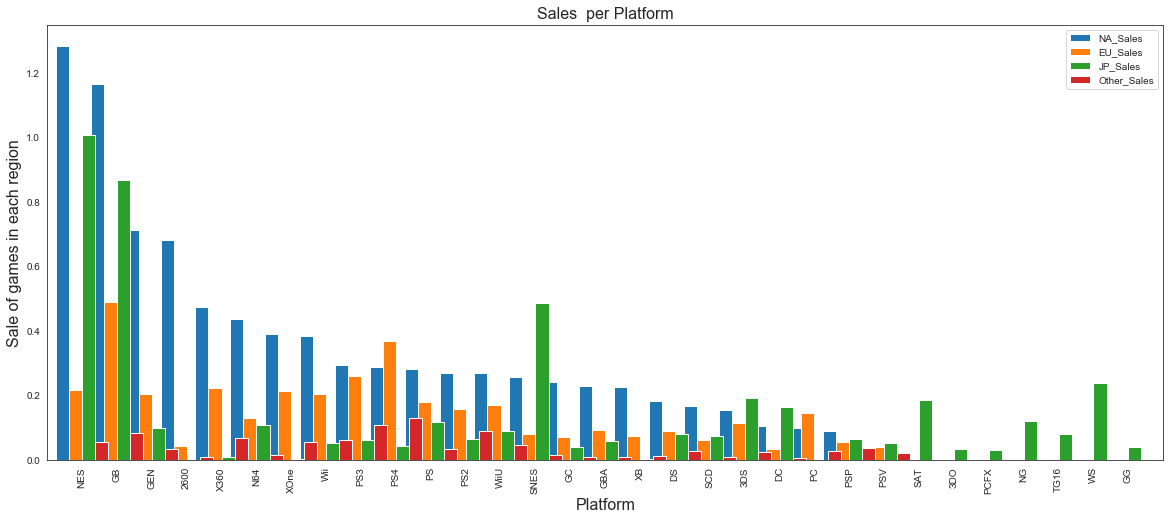

In [16]:
df5 = data_read.groupby(['Platform'])['Global_Sales'].agg('sum')
print("Most Popular Platform according to Global Sales : ",df5.max())
df6 = data_read.groupby(['Platform'])
val = df6['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean).sort_values('NA_Sales', ascending=False)
val.plot(kind='bar',figsize=(20,8),width=1.5)
plt.xlabel('Platform',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales  per Platform',fontsize=16)

### Most popular platform according to region can be seen from above graph , NES is most popular for NA and Japan. GB is for EU and PS4  for other regions. 

## 11.	Which genre is popular for which region?

Text(0.5,1,'Sales as per Genre')

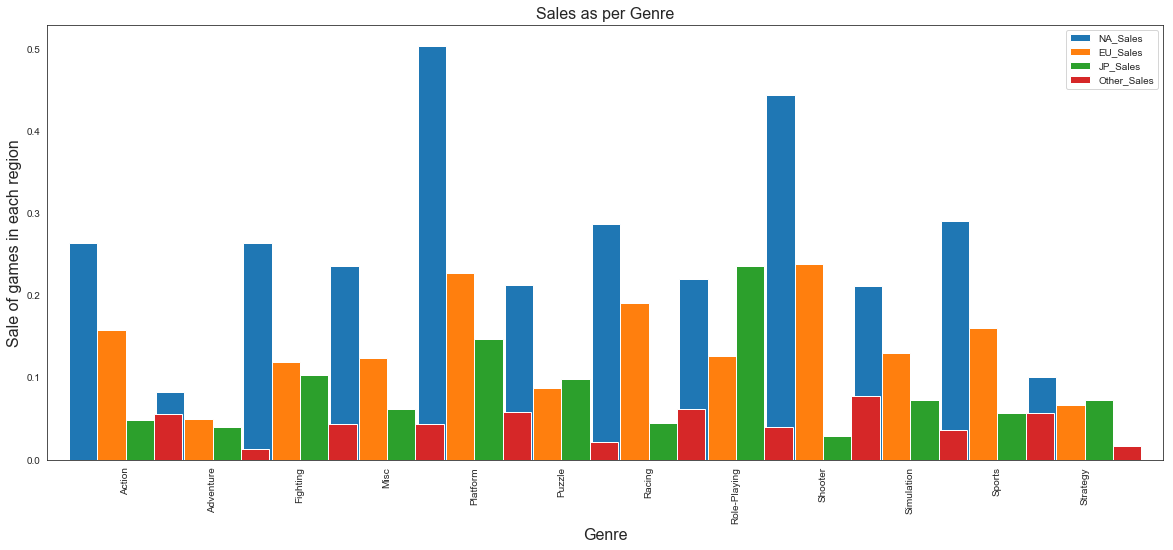

In [17]:
df3 = data_read.groupby(['Genre'])
val = df3['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,8),width=1.3)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per Genre',fontsize=16)

### Most popular genre according to region can be seen from above graph , Platform is most popular for NA , Shooter for Japan and for EU and simulation games for other regions. 

## 12.	What is the game count by platform?

In [18]:
df5 = data_read.groupby(['Platform'])['Platform'].count()
df5

Platform
2600     133
3DO        3
3DS      509
DC        52
DS      2163
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
Name: Platform, dtype: int64

### Game counts can be seen above.

## 13.	What is the game count by Publisher?

In [19]:
df10 = data_read.groupby(['Platform'])['Platform'].count()
df10

Platform
2600     133
3DO        3
3DS      509
DC        52
DS      2163
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
Name: Platform, dtype: int64

### Game count by publisher can be seen above.

## 14.	What is the game count by genre? 

In [20]:
df11 = data_read.groupby(['Genre'])['Genre'].count()
df11

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Genre, dtype: int64

### Game count by genre can be seen above

## 15.	How is the heatmap showing correlation for this dataset?

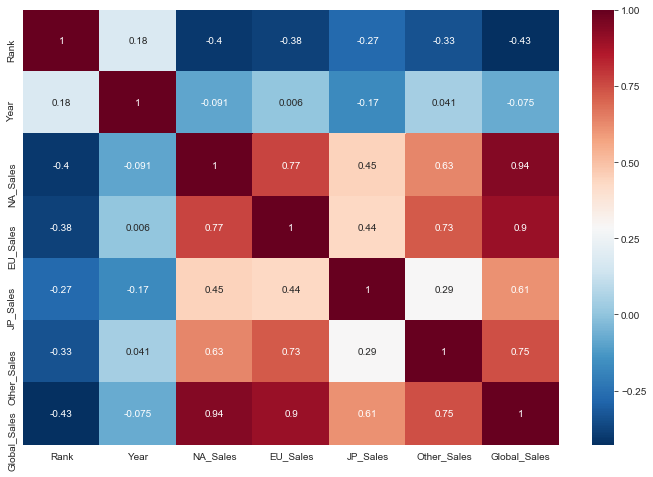

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(data_read.corr(),annot=True,cmap='RdBu_r')

## 16. What are revenues  for top 5 publishers?

Text(0,0.5,'Revenue')

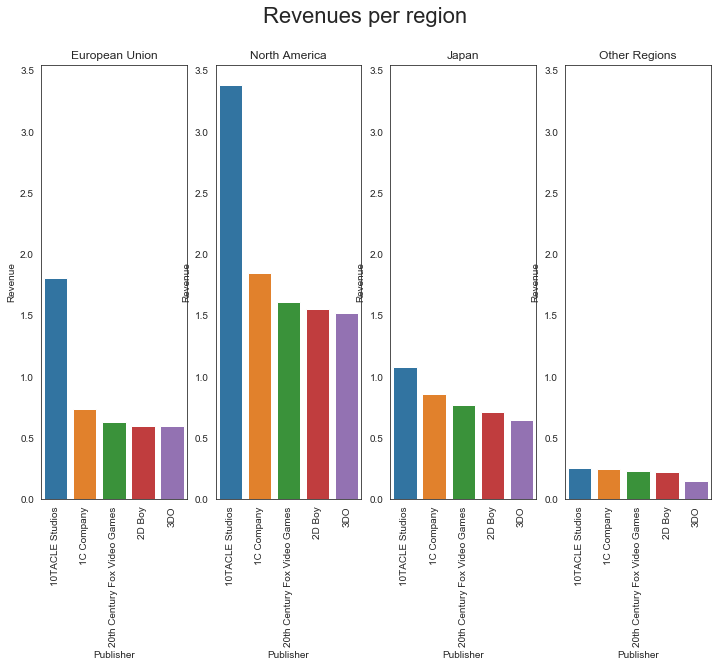

In [22]:
df_publishers = data_read.groupby('Publisher')
plot_publishers = df_publishers['NA_Sales','JP_Sales','EU_Sales','Other_Sales'].mean()
sort_publishers = plot_publishers.sort_values('EU_Sales',ascending=False)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = 'European Union', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).EU_Sales)
plt.title('European Union')
plt.ylabel('Revenue')
plt.suptitle('Revenues per region',size=22)
sort_publishers = plot_publishers.sort_values('NA_Sales',ascending=False)
ax2 = fig.add_subplot(1,4,2,sharey=ax1)
ax2.set_xticklabels(labels = 'North America', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).NA_Sales)
plt.title('North America')
plt.ylabel('Revenue')
sort_publishers = plot_publishers.sort_values('JP_Sales',ascending=False)
ax3 = fig.add_subplot(1,4,3,sharey=ax1)
ax3.set_xticklabels(labels = 'Japan', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).JP_Sales)
plt.title('Japan')
plt.ylabel('Revenue')
sort_publishers = plot_publishers.sort_values('Other_Sales',ascending=False)
ax4 = fig.add_subplot(1,4,4,sharey=ax1)
ax4.set_xticklabels(labels = 'Japan', rotation=90)
sns.barplot(x=plot_publishers.head(5).index, y=sort_publishers.head(5).Other_Sales)
plt.title('Other Regions')
plt.ylabel('Revenue')